In [ ]:
# 학습셋, 테스트셋 분리

import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
# MAE 계산

from sklearn.metrics import median_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
median_absolute_error(y_true, y_pred)

0.5

In [ ]:
# MSE 계산

from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

In [ ]:
# 알스퀘어 계산

from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

**회귀 모델 실습**

In [ ]:
# 필요한 패키지 설치

import pandas as pd # csv file 
import numpy as np
from sklearn.linear_model import LinearRegression # 선형회귀모델 생성 
from sklearn.model_selection import train_test_split # train/test set 생성 
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error # MSE : 평균제곱오차 - model 평가 
from sklearn import datasets # sklearn 기본 데이터셋 load
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기

# https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
df = pd.read_csv("")

# 데이터 샘플 확인
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# 각 컬럼의 속성 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# 각 컬럼의 통계치 확인
df.describe()

# 결측치가 있거나 이상치가 있으면 보정 및 제거를 해주어야 한다. 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


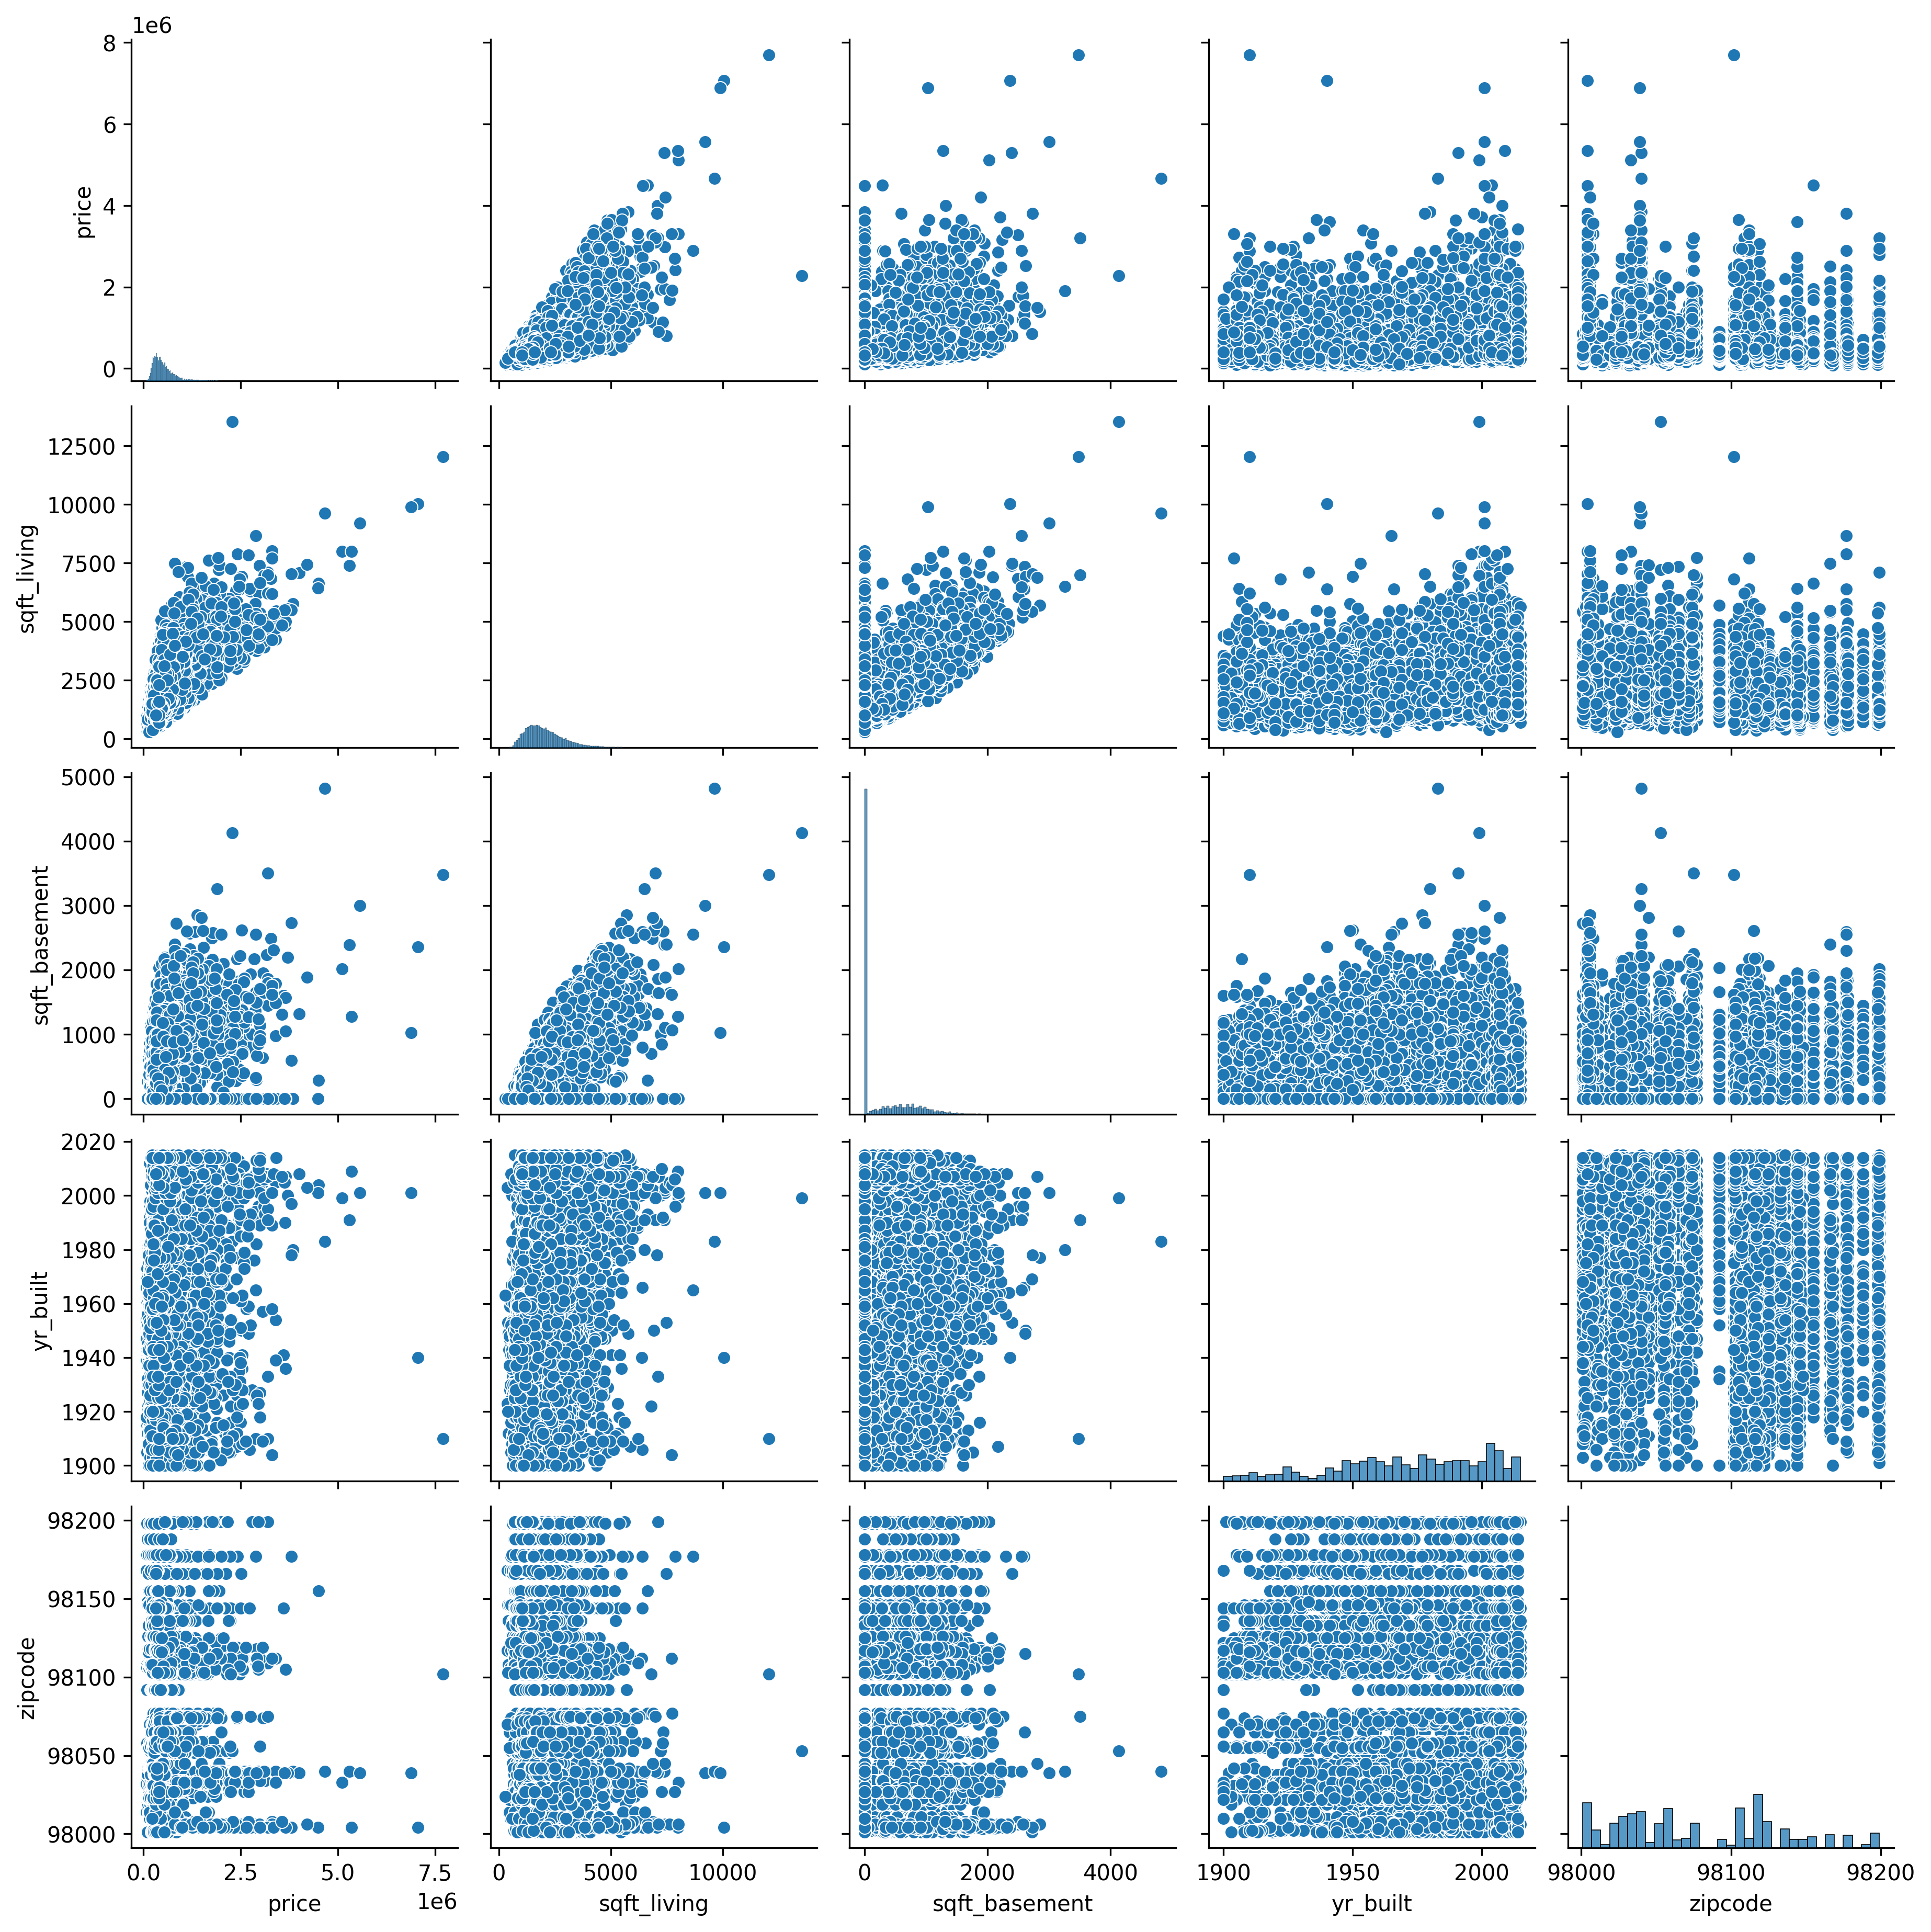

In [ ]:
# 데이터 시각화 하여 분포 확인하기

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

sns.@@@@@@(df[["price", "sqft_living", "sqft_basement", "yr_built", "zipcode"]])
plt.show()

In [ ]:
# 변수 선택 및 컬럼명 붙여넣기 위한 컬럼 리스트 생성
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# 독립변수와 종속변수 분리하여 생성
x = df[[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
# 'id', 'date'는 키값에 해당하므로 변수에서 제외 해준다.
y = df[['@@@@@']]

# 학습셋과 테스트셋 분리하여 생성(7:3)
x_train, x_test, y_train, y_test = @@@@@@@@@@@@@@@(x, y, train_size=0.7, test_size=0.3)

In [ ]:
# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  15129
test data 개수:  6484


In [ ]:
# 다중회귀모델 생성
mreg = @@@@@@@@@@@@@@(fit_intercept=True)
mreg.fit(x_train, y_train) 
# 앞서 설치했던 sklearn의 LinearRegression을 학습데이터에 적용 해준다. 학습 데이터를 통해 price를 예측할 수 있는 회귀계수가 생성된다. 
# fit_intercept 인수는 모형에 상수항을 넣을지 말지를 설정해 주는 명령어다. 기본 값은 True라서 상수항을 빼지 않을 거라면, 생략해도 된다.

LinearRegression()

In [ ]:
# 테스트셋에 모델 적용
y_predict = mreg.@@@@@@@@@(x_test)

In [ ]:
print("학습셋 R-Square: {:.2f}".format(mreg.score(x_train, y_train)))
print("테스트셋 R-Square: {:.2f}".format(mreg.score(x_test, y_test)))

학습셋 R-Square: 0.70
테스트셋 R-Square: 0.69


In [ ]:
# 모델의 상수값 확인
print(mreg.intercept_)

# 모델의 회귀계수 확인
print(mreg.@@@@@@@)

# 그런데 LinearRegression 패키지는 R스퀘어 등 자세한 모델 결과치 확인이 어렵다. 수식을 코딩해주면 가능하지만, 여간 번거로운 일이 아니다. 
# 그래서 자세한 모델 결과값을 확인하고 싶을 때는 OLS(Ordinary Least Squares) 패키지를 사용하면 편리하다.

[8386757.11764663]
[[-3.61622456e+04  3.84917173e+04  1.06696809e+02  1.55329931e-01
   1.08352468e+04  6.08599832e+05  5.07993319e+04  2.56423098e+04
   9.29124468e+04  6.60449280e+01  4.06518808e+01 -2.57696361e+03
   2.56573229e+01 -5.82575136e+02  6.06356093e+05 -1.99019214e+05
   3.35128580e+01 -4.50939252e-01]]


In [ ]:
ols_m = sm.@@@@@@@@@(y_train, sm.add_constant(x_train)).fit()
ols_m.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2090.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:43:45   Log-Likelihood:            -2.0585e+05
No. Observations:               15129   AIC:                         4.117e+05
Df Residuals:                   15111   BIC:                         4.119e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.387e+06   3.43e+06      2.444      0.015    1.66e+06    1.51e+07
bedrooms      -3.616e+04   2322.330    -15.572      0.000   -4.07e+04   -3.16e+04
bathrooms      3.849e+04   3816.903     10.085      0.000     3.1e+04     4.6e+04
sqft_living     106.6929      2.697     39.567      0.000     101.407     111.978
sqft_lot          0.1553      0.052      3.013      0.003       0.054       0.256
floors         1.084e+04   4222.193      2.566      0.010    2559.237    1.91e+04
waterfront     6.086e+05      2e+04     30.443      0.000    5.69e+05    6.48e+05
view            5.08e+04   2501.043     20.311      0.000    4.59e+04    5.57e+04
condition      2.564e+04   2755.165      9.307      0.000    2.02e+04     3.1e+04
grade          9.291e+04   2518.001     36.899      0.000     8.8e+04    9.78e+04
sqft_above       66.0488      2.657     24.855      0.000      60.840      71.258
sqft_basement    40.6558      3.090     13.156      0.000      34.598      46.713
yr_built      -2576.9636     85.188    -30.250      0.000   -2743.942   -2409.986
yr_renovated     25.6573      4.260      6.022      0.000      17.306      34.008
zipcode        -582.5751     38.470    -15.144      0.000    -657.980    -507.170
lat            6.064e+05   1.25e+04     48.435      0.000    5.82e+05    6.31e+05
long           -1.99e+05   1.53e+04    -13.038      0.000   -2.29e+05   -1.69e+05
sqft_living15    33.5129      4.030      8.316      0.000      25.614      41.412
sqft_lot15       -0.4509      0.083     -5.436      0.000      -0.614      -0.288
==============================================================================
Omnibus:                    12259.011   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1127504.201
Skew:                           3.313   Prob(JB):                         0.00
Kurtosis:                      44.770   Cond. No.                     5.05e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.02e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import mean_absolute_percentage_error # MAPE


# RMSE 산출 (MSE에 루트 적용)
MSE = mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(MSE)
print(("RMSE : {:.2f}".format(RMSE)))

# MAE 산출
MAE = @@@@@@@@@@@(y_test, y_predict)
print(("MAE : {:.2f}".format(MAE)))

# MAPE 산출
MAPE = mean_absolute_percentage_error(y_test, y_predict)
print(("MAPE : {:.2f}".format(MAPE)))

RMSE : 212512.25
MAE : 127888.02
MAPE : 0.26
